# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1648582148000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.10.3","count":324},"features":[{"type":"Feature","properties":{"mag":4.8,"place":"28 km W of Poblacion, San Felipe, Philippines","time":1648580137258,"updated":1648581762040,"tz":null,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us7000gy70","detail":"https://earth


In [28]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [29]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 4.8, 'place': '28 km W of Poblacion, San Felipe, Philippines', 'time': 1648580137258, 'updated': 1648581762040, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000gy70', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us7000gy70.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 354, 'net': 'us', 'code': '7000gy70', 'ids': ',us7000gy70,', 'sources': ',us,', 'types': ',origin,phase-data,', 'nst': None, 'dmin': 7.845, 'rms': 0.69, 'gap': 94, 'magType': 'mb', 'type': 'earthquake', 'title': 'M 4.8 - 28 km W of Poblacion, San Felipe, Philippines'}, 'geometry': {'type': 'Point', 'coordinates': [119.8032, 15.025, 47.44]}, 'id': 'us7000gy70'}


In [30]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [119.8032, 15.025, 47.44], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '7000gy70',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us7000gy70.geojson',
 'dmin': 7.845,
 'felt': None,
 'gap': 94,
 'ids': ',us7000gy70,',
 'mag': 4.8,
 'magType': 'mb',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': '28 km W of Poblacion, San Felipe, Philippines',
 'rms': 0.69,
 'sig': 354,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1648580137258,
 'title': 'M 4.8 - 28 km W of Poblacion, San Felipe, Philippines',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',origin,phase-data,',
 'tz': None,
 'updated': 1648581762040,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000gy70'}


In [39]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 4.8 - 28 km W of Poblacion, San Felipe, Philippines
M 2.8 - 3km NNW of The Geysers, CA
M 2.6 - 13km SSW of Salton City, CA
M 4.6 - Fiji region
M 5.0 - 143 km WNW of Naha, Japan
M 5.4 - 140 km WNW of Naha, Japan
M 5.5 - off the coast of Michoacan, Mexico
M 4.9 - 80 km WNW of Cabra, Philippines
M 4.4 - 62 km ESE of Ishinomaki, Japan
M 4.6 - 46 km E of Ichinohe, Japan
M 4.4 - 130 km WNW of Naha, Japan
M 4.2 - 136 km NW of Hirara, Japan
M 4.3 - 179 km WSW of Puerto Casma, Peru
M 3.5 - 26 km E of Honaunau-Napoopoo, Hawaii
M 2.5 - 22 km ENE of Honaunau-Napoopoo, Hawaii
M 2.8 - 20 km ENE of Honaunau-Napoopoo, Hawaii
M 2.5 - 8 km E of Skwentna, Alaska
M 4.3 - 1 km ESE of Sardínia, Greece
M 2.9 - 3 km SSE of Guánica, Puerto Rico
M 3.7 - 114 km NE of Punta Cana, Dominican Republic
M 2.7 - 7 km WSW of La Parguera, Puerto Rico
M 4.4 - 71 km E of Hualien City, Taiwan
M 2.6 - 40 km E of Port Alsworth, Alaska
M 3.0 - 4 km S of Macclesfield, Australia
M 4.5 - 6 km SSW of Tual, Indonesia
M 5.2 - 234 

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

324


In [9]:
# print the first few lines of data

print(df.head())

   magnitude   depth
0       4.80   47.44
1       2.75    0.48
2       2.56    6.52
3       4.60  605.60
4       5.00   10.00


In [10]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  324.000000  324.000000
mean     3.811128   50.863434
std      0.968520   95.492424
min      2.450000   -1.230000
25%      2.800000   10.000000
50%      4.100000   10.870000
75%      4.600000   49.075000
max      6.000000  605.600000


<AxesSubplot:xlabel='magnitude', ylabel='depth'>

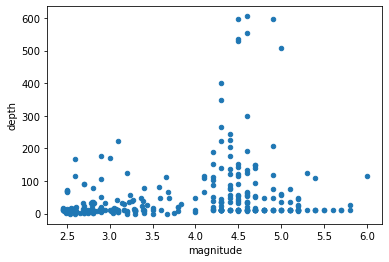

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [12]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [13]:
# read it back later

new_df = pd.read_csv('usgs_earthquake_data.csv')

print(new_df.head())

   Unnamed: 0  magnitude   depth
0           0       4.80   47.44
1           1       2.75    0.48
2           2       2.56    6.52
3           3       4.60  605.60
4           4       5.00   10.00


In [ ]:
#Exercise of Earthquakes

In [43]:
#Pull out all cordinates and depths for the earthquakes 
for q in quakes:
    print(q['geometry']['coordinates'])

[119.8032, 15.025, 47.44]
[-122.7716675, 38.7996674, 0.48]
[-116.0031667, 33.1905, 6.52]
[-179.4089, -21.7095, 605.6]
[126.3864, 26.779, 10]
[126.4369, 26.8123, 10]
[-104.396, 15.2266, 10]
[119.3435, 14.109, 10]
[141.9988, 38.286, 35]
[141.8255, 40.1422, 33.46]
[126.5865, 26.8631, 10]
[124.55, 25.8291, 189.37]
[-79.802, -10.2702, 10]
[-155.616166666667, 19.42, -0.79]
[-155.658828735352, 19.5021667480469, -1.23000001907349]
[-155.677, 19.5085, 5.11]
[-151.2371, 61.9928, 68.2]
[21.2267, 38.8865, 10]
[-66.8941666666667, 17.9443333333333, 7.26]
[-67.7135, 19.375, 49]
[-67.1073333333333, 17.9455, 10.94]
[122.3055, 23.9243, 10]
[-153.5874, 60.1596, 166]
[138.8378, -35.2131, 10]
[132.723, -5.6818, 10]
[170.069, -22.1111, 10]
[-104.2152, 31.6384, 5]
[-110.922, 44.7578333, 10.21]
[-103.1901, 31.1443, 6.44]
[-111.4633333, 42.5991667, 3.79]
[-66.4228333333333, 18.562, 78.96]
[-156.091333333333, 19.8993333333333, 46.54]
[-67.1143333333333, 17.956, 10.71]
[-179.7865, -23.7103, 530.38]
[-152.3265, 5

In [58]:
# pull out longtitudes and latitudes into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

l = {'longtitude': [q['geometry']['coordinates'][0] for q in quakes],
      'latitude': [q['geometry']['coordinates'][1] for q in quakes]}
df_2 = pd.DataFrame.from_dict(l)

# how many earthquakes were loaded into the dataframe?
print(len(df))

324


In [59]:
print(df_2.head())

   longtitude   latitude
0  119.803200  15.025000
1 -122.771668  38.799667
2 -116.003167  33.190500
3 -179.408900 -21.709500
4  126.386400  26.779000


In [60]:
# print some descriptive statistics

print(df_2.describe())

       longtitude    latitude
count  324.000000  324.000000
mean   -28.734288   21.028820
std    116.774243   23.818745
min   -179.786500  -58.732900
25%   -115.002650   14.184325
50%    -67.503417   19.527300
75%    121.511650   37.340650
max    179.703600   72.318000


<AxesSubplot:xlabel='longtitude', ylabel='latitude'>

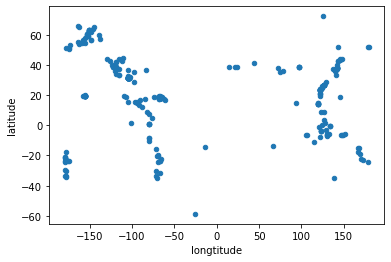

In [61]:
df_2.plot(x='longtitude', y='latitude', kind='scatter')

# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [15]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [16]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [17]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


In [18]:
# print it more nicely

pp.pprint(data)

{'error_message': 'You must use an API key to authenticate each request to '
                  'Google Maps Platform APIs. For additional information, '
                  'please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}


In [19]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [1]:
pip install TwitterAPI

Note: you may need to restart the kernel to use updated packages.


In [2]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [3]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [4]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [8]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

Season Ticket renewals for the 2022 @UKFootball season end this Friday, April 1st!

Renew today through your My UK… https://t.co/botl3tashv


In [9]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Mar 29 23:00:04 +0000 2022',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/1…',
                        'expanded_url': 'https://twitter.com/i/web/status/1508942094437695493',
                        'indices': [116, 139],
                        'url': 'https://t.co/botl3tashv'}],
              'user_mentions': [{'id': 360022514,
                                 'id_str': '360022514',
                                 'indices': [36, 47],
                                 'name': 'Kentucky Football',
                                 'screen_name': 'UKFootball'}]},
 'favorite_count': 54,
 'favorited': False,
 'geo': None,
 'id': 1508942094437695493,
 'id_str': '1508942094437695493',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 

### Other API endpoints allow different types of searches

In [7]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @twtSMH: #BBN Star's ⭐
@twtSMH @BAA_WA
@Nysar7 @Tcs_12
@Hf33z @ea30_4
@MiG9t @Azix103
@1Aw55 @786Nim
@Zeba_Khn @7ilent_1
@_paro1 @NZPAK_…

RT @Hf33z: Star💫
@786Nim @NZPAK_ @Khrm23
@M_ZA_5 @NQI_9 @twtSMH
@s1_m_s @BBNPROMO @Titl_i
@1Aw55 @Azix103 @Yqbh2
@Aln_m6 @1kckt @Bhii68
@Ra…

RT @twtSMH: #BBN Star's ⭐
@twtSMH @BAA_WA
@Nysar7 @Tcs_12
@Hf33z @ea30_4
@MiG9t @Azix103
@1Aw55 @786Nim
@Zeba_Khn @7ilent_1
@_paro1 @NZPAK_…

RT @_OA01: Star💫
@786Nim @NZPAK_ @Khrm23
@M_ZA_5 @NQI_9 @twtSMH
@s1_m_s @BBNPROMO @Titl_i
@1Aw55 @Azix103 @Yqbh2
@Aln_m6 @1kckt @Bhii68
@Ra…

RT @o_mcghee2023: Huge shoutout to @UKCoachLZ + @NiyaButts for coming through to see the fam!!! Looking forward to getting back on campus s…



In [8]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @SevadalDL: ईस्ट एमसीडी के सदन में जमकर चले लात-घूंसे-चप्पल। सत्ता पक्ष और विपक्ष के बीच खूब हुआ असंसदीय शब्दों का इस्तेमाल।

दिल्ली का…

RT @KVS_HQ: परीक्षा की बात, पीएम के साथ

परीक्षा पे चर्चा 2022

दिनांक 1 अप्रैल 2022, शुक्रवार
प्रातः 11ः00 बजे
तालकटोरा स्टेडियम, नई दि…

RT @Shalinisahu1234: #AsharamjiBapuQuotes - ' जीवन केवल कमाने खाने और मर जाने के लिए या पशुओं की तरह जीने के लिए नहीं है, जीवन आनंद उल्लास…

RT @RamanDi56524846: #महोबा दो महिने की गर्भवती महिला की कर दी नसबंदी महोबा मे कुछ भी मुमकिन उच्च गुलाबी के नशे मे चूर, नटवरलाल कलमकार मरीज…

RT @DaggerDD: Kuch bhi kaho Bhabiji badhiya photo grapher hai . Dekho kaise mast click liye hai dhruv bhai ka @InvincibleDhruv . https://t.…



In [9]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

crying

Last week we were joined by Carmen and Drew from the @Reds to tell us about the foundation they have built in sport… https://t.co/LovWAuzz0V

Had a great visit at The University of Kentucky‼️@UKFootball 
@QBUniverseQBU @QBHitList @RabunFootball @coachheavyd… https://t.co/6mBgVdNqgT

Lisa L Peel would love to show you the #listing at 435 Park Avenue #Lexington #KY  #realestate… https://t.co/KORuorK73q

Another great day at the University of Kentucky! 👍🏻 https://t.co/mWDSKGX4PL

I am single-handedly keeping @redbaronpizza in business.

Kick off Round 2 of Nutrition Month Madness TODAY at Fresh Food Co! Kevin and Danielle are competing in the battle… https://t.co/NJtmRvC5Hs



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [ ]:
#Exercise 1. Different search 

In [12]:
# search for public tweets about #UKSwimmimg

endpoint = 'search/tweets'
params = {
    'q': '#UKSwim', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

150 wooden medals for Axholme North Triathlon finished off today #uktriathlon #triathlon #openwaterswimming… https://t.co/quyqRkZnaV



In [14]:
# search for public tweets in Russian

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'ru', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@follyflly А в конце заплакал.

@rianru Kak в 1941 во времени Второй мировой спецоперации?

RT @1VYmMDoG7vUwZfP: @D38301104 @dimash_official

#Stranger 
#Stranger_Dimash
#StrangerTheSong 
#DimashStrangerLive 
На свете много музыкал…

RT @SevcenkoPanas: Каждый президент Украины боролся с советским прошлом понемногу, один улицы переименовывал, другой памятники сносил, трет…

RT @myrevolutionrus: Уничтоженная российским спецназом в районе Харькова инкассаторская машина, которая использовалась украинскими национал…



In [15]:
# search for public tweets about #UKSwimmimg

endpoint = 'search/tweets'
params = {
    'q': 'music', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @noahdonotcare: "are u busy rn?" yes i am listening to music

i’m able to bear school and work stress as if nothing but snap for the stupidest reasons. yesterday i literally had… https://t.co/WSCRRd1iD0

RT @TIME: HYBE's Bang Si-Hyuk is reinventing the music business—with a little help from BTS (@BTS_twt) #TIME100Companies https://t.co/yhQdn…

@onemoreonce4bts @BTS_twt 가자!! 

Keep streaming #BTS_Butter on all music platforms #BTS 
@BTS_twt

RT @oshcuddles: “HURDLE” IS A POP ROCK SONG FOR THIS JUNMYEON COMEBACK AND WE WILL GET A MUSIC VIDEO FOR IT!!

#Suho_Hurdle 
#SUHO_GreySuit…



In [ ]:
#Exercise 2. Searching for more data fields

In [ ]:
#How can we pull out memes or pictures instead of text?


### Bonus: Streaming live tweets in real time 

In [10]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Wed Mar 30 17:25:06 +0000 2022
Morgantown, WV, United States
Me 🤣

Wed Mar 30 17:25:06 +0000 2022
Alexandria, Egypt, Egypt
هيحصل اى لو الدنيا أدت كل واحد الشخص إلى بيحبه ويفضلوا سوا ويعيشوا ف سلام كدا...؟ هل الدنيا هتخس؟ ولا كرامتها مش سا… https://t.co/svt3z3BaMZ

Wed Mar 30 17:25:06 +0000 2022
Braulio E. Dujali, Davao Region, Republic of the Philippines
Na balingag najud imong utok tungod sa politima HAHA. Mao gani gi block takas Facebook og diris twitter no kay samo… https://t.co/IVvv9J4tdx

Wed Mar 30 17:25:06 +0000 2022
Greater Vancouver, British Columbia, Canada
不明白到底辱了你哪里总觉得世界与你为敌👉👈

Wed Mar 30 17:25:06 +0000 2022
Chivenor, England, United Kingdom
@GinaPera @XianJaneway Snap! I love the Liberation theologians and Jesuits. They made a huge difference and of cour… https://t.co/9ODure22QE

Wed Mar 30 17:25:06 +0000 2022
Centurion, South Africa, South Africa
@ATswanaGoddess 😭😭 Why didn't he have a sense of humor le ene? 💀😂

Wed Mar 30 17:25:06 +0000 2022
Parma Heights, OH, United Sta

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [ ]:
#Excersise 1, Scatter plot of earthquakes lat - lon 

In [62]:
#Pull out all cordinates and depths for the earthquakes 
for q in quakes:
    print(q['geometry']['coordinates'])

[119.8032, 15.025, 47.44]
[-122.7716675, 38.7996674, 0.48]
[-116.0031667, 33.1905, 6.52]
[-179.4089, -21.7095, 605.6]
[126.3864, 26.779, 10]
[126.4369, 26.8123, 10]
[-104.396, 15.2266, 10]
[119.3435, 14.109, 10]
[141.9988, 38.286, 35]
[141.8255, 40.1422, 33.46]
[126.5865, 26.8631, 10]
[124.55, 25.8291, 189.37]
[-79.802, -10.2702, 10]
[-155.616166666667, 19.42, -0.79]
[-155.658828735352, 19.5021667480469, -1.23000001907349]
[-155.677, 19.5085, 5.11]
[-151.2371, 61.9928, 68.2]
[21.2267, 38.8865, 10]
[-66.8941666666667, 17.9443333333333, 7.26]
[-67.7135, 19.375, 49]
[-67.1073333333333, 17.9455, 10.94]
[122.3055, 23.9243, 10]
[-153.5874, 60.1596, 166]
[138.8378, -35.2131, 10]
[132.723, -5.6818, 10]
[170.069, -22.1111, 10]
[-104.2152, 31.6384, 5]
[-110.922, 44.7578333, 10.21]
[-103.1901, 31.1443, 6.44]
[-111.4633333, 42.5991667, 3.79]
[-66.4228333333333, 18.562, 78.96]
[-156.091333333333, 19.8993333333333, 46.54]
[-67.1143333333333, 17.956, 10.71]
[-179.7865, -23.7103, 530.38]
[-152.3265, 5

In [63]:
# pull out longtitudes and latitudes into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

l = {'longtitude': [q['geometry']['coordinates'][0] for q in quakes],
      'latitude': [q['geometry']['coordinates'][1] for q in quakes]}
df_2 = pd.DataFrame.from_dict(l)

# how many earthquakes were loaded into the dataframe?
print(len(df))

324


In [64]:
print(df_2.head())

   longtitude   latitude
0  119.803200  15.025000
1 -122.771668  38.799667
2 -116.003167  33.190500
3 -179.408900 -21.709500
4  126.386400  26.779000


In [65]:
# print some descriptive statistics
print(df_2.describe())

       longtitude    latitude
count  324.000000  324.000000
mean   -28.734288   21.028820
std    116.774243   23.818745
min   -179.786500  -58.732900
25%   -115.002650   14.184325
50%    -67.503417   19.527300
75%    121.511650   37.340650
max    179.703600   72.318000


<AxesSubplot:xlabel='longtitude', ylabel='latitude'>

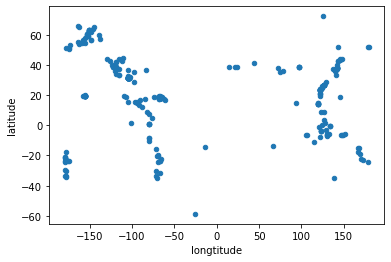

In [66]:
#Scatter Plot lon vs lat
df_2.plot(x='longtitude', y='latitude', kind='scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
